In [49]:
import matplotlib.pyplot as plt
import numpy as np
import torch

import pyro
import torch
import pyro.distributions as dist

import time

In [50]:
from torch.distributions import constraints
from pyro.optim import SGD
from pyro.infer import Trace_ELBO, TraceEnum_ELBO
import matplotlib.pyplot as plt
from pyro.contrib.autoguide import AutoDiagonalNormal


def svi(temperature_model, guide, obs, num_steps = 5000, plot = False):
    pyro.clear_param_store()
    svi = pyro.infer.SVI(model=temperature_model,
                         guide=guide,
                         optim=SGD({"lr": 0.001, "momentum":0.1}),
                         loss=Trace_ELBO())

    losses, a,b  = [], [], []
    
    for t in range(num_steps):
        losses.append(svi.step(obs))

    if (plot):
        plt.plot(losses)
        plt.title("ELBO")
        plt.xlabel("step")
        plt.ylabel("loss");
        plt.show()

In [51]:
pyro.clear_param_store()

obs = {'counts': torch.tensor([float(np.random.binomial(1, 0.5, )) for i in range(100)])}
# obs = {'counts': torch.tensor([1., 0., 0., 0.])}

def model(obs):
    p = pyro.param('p', torch.tensor(0.8))
    for i in range(obs['counts'].shape[0]):
        counts = pyro.sample(f'counts_{i}', dist.Bernoulli(p), obs=obs['counts'][i])
        
def guide(obs):
    pass
#     for i in range(obs['counts_2'].shape[0]):
#         spike = pyro.sample(f'spike_1_{i}', dist.Bernoulli(0.5))
        

In [52]:
#Run inference
svi(model, guide, obs, num_steps=1000)

#Print results
print('p:', pyro.param("p").item())

p: 0.48000001907348633


In [53]:
pyro.clear_param_store()

def model(obs):
    p = pyro.sample('p', dist.Beta(1,1))
    for i in range(obs['counts'].shape[0]):
        counts = pyro.sample(f'counts_{i}', dist.Bernoulli(p), obs=obs['counts'][i])
        
def guide(obs):
    a = pyro.param('a', torch.tensor(1.), constraint=constraints.positive)
    b = pyro.param('b', torch.tensor(1.), constraint=constraints.positive)
    p = pyro.sample('p', dist.Beta(a,b))
    pass
#     for i in range(obs['counts_2'].shape[0]):
#         spike = pyro.sample(f'spike_1_{i}', dist.Bernoulli(0.5))
        

In [54]:
#Run inference
svi(model, guide, obs, num_steps=1000)

#Print results
print('p:', pyro.param("b").item())

p: 14.58899974822998


In [71]:
x = torch.from_numpy(np.linspace(0, 1, 1000)).float()
posterior = dist.Beta(pyro.param("a"), pyro.param("b"))
y = torch.exp(posterior.log_prob(x))

prior = dist.Beta(0.7, 1)
y2 = torch.exp(prior.log_prob(x))

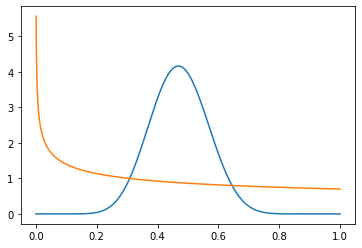

In [72]:
plt.figure()
plt.plot(np.array(x), np.array(y.detach().numpy()))
plt.plot(np.array(x), np.array(y2.detach().numpy()))
plt.show()